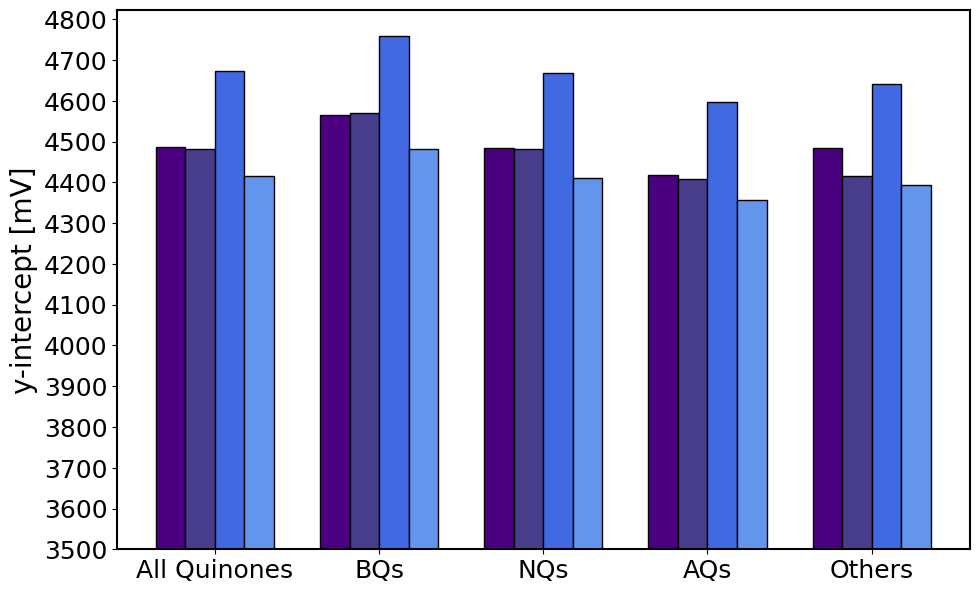

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Categories
categories = ['All Quinones', 'BQs', 'NQs', 'AQs', 'Others']

baseline = 3500

# Data: List of lists, where each sublist contains values for a category
values = [[986,982,1173,915], [1066,1069,1259,982], [985,981,1167,910], [917,909,1096,856], [983,916,1140,893]]

# Number of categories
N = len(categories)

# Position of bars on x-axis
ind = np.arange(N)

# Width of a bar
width = 0.18

plt.figure(figsize=(11, 7))

# Custom legend labels
legend_labels = ['PCM-cycle', 'PCM-direct', 'COSMO', 'SM12']

# Define the custom colors
custom_colors = ['#4B0082', '#483D8B', '#4169E1', '#6495ED']

# Plotting
for i in range(len(values[0])):
    # Extract the values for the i-th group across all categories
    ith_values = [value[i] for value in values]
    plt.bar(ind + i * width, ith_values, width, color=custom_colors[i], label=legend_labels[i], edgecolor='black')

# Calculate the center of each group of bars
group_centers = ind + (len(values[0]) - 1) * width / 2

# X-axis labels
plt.xticks(group_centers, categories, fontsize=20)


from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

class HandlerRect(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5*width - 0.5*xdescent, 0.5*height - 0.5*ydescent
        p = mpatches.Rectangle(xy=center, width=height, height=height*0.5)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

# Now use the custom handler when creating the legend
# plt.legend(handler_map={mpatches.Rectangle: HandlerRect()})
plt.xticks(fontsize=18)  # Increase font size of x-axis tick labels
plt.yticks(fontsize=18)  # Increase font size of y-axis tick labels
# Custom y-ticks
plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(100))

plt.ylabel('y-intercept [mV]', fontsize=20)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

# Custom tick formatter to remove the ending 0 from y-labels
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x+baseline)}'))

# Show plot
plt.show()
